In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [120]:
uploaded = files.upload()
table1 = pd.read_excel(io.BytesIO(uploaded['table1_cleaned.xlsx']))

Saving table1_cleaned.xlsx to table1_cleaned.xlsx


In [121]:
year_range = [str(i) for i in range(2012, 2024)]
table1.columns = ["Industry_Group", "Industry", "Subindustry"] + year_range

table1.replace("…", pd.NA, inplace=True)
table1["Industry_Group"] = table1["Industry_Group"].ffill()
table1["Industry"] = table1["Industry"].ffill()

table1.head(15)


,Industry_Group,Industry,Subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space Economy Total,Space Economy Total,NaN,101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962
1,Private Industries,Private Industries Total,NaN,79861,89170,90495,98536,99506,98699,95196,96575,92167,85568,87779,86351
2,Private industries,"Agriculture, forestry, fishing, and hunting Total",NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Private industries,"Agriculture, forestry, fishing, and hunting",Farms,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Private industries,"Agriculture, forestry, fishing, and hunting","Forestry, fishing, and related activities",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,Private industries,Mining Total,NaN,53,41,51,45,26,10,4,5,2,2,2,2
6,Private industries,Mining,Oil and gas extraction,39,30,38,32,18,6,3,3,1,1,1,1
7,Private industries,Mining,"Mining, except oil and gas",0,0,0,1,1,1,0,0,0,0,0,0
8,Private industries,Mining,Support activities for mining,14,10,13,12,7,3,1,1,1,1,1,1
9,Private industries,Utilities Total,NaN,1,1,1,2,2,2,2,1,1,2,2,1


In [122]:
#Used ChatGPT for syntax help

df_totals_only = table1[table1[table1.columns[1]]
                        .astype(str)
                        .str.contains("Total", case=False, na=False)]

df_reals_only = df_totals_only.dropna(subset=[df_totals_only.columns[14]]).drop(columns=[df_totals_only.columns[2]])
df_filtered = df_reals_only[df_reals_only[df_reals_only.columns[3]] >= 10000]

df_filtered.head(15)

,Industry_Group,Industry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space Economy Total,Space Economy Total,101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962
1,Private Industries,Private Industries Total,79861,89170,90495,98536,99506,98699,95196,96575,92167,85568,87779,86351
11,Private industries,Manufacturing Total,24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773
14,Private industries,Wholesale trade Total,14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101
29,Private industries,Information Total,31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859
48,Government Total,Government Total,22512,22474,22759,23333,23548,23485,24177,26249,25795,25981,27496,29679


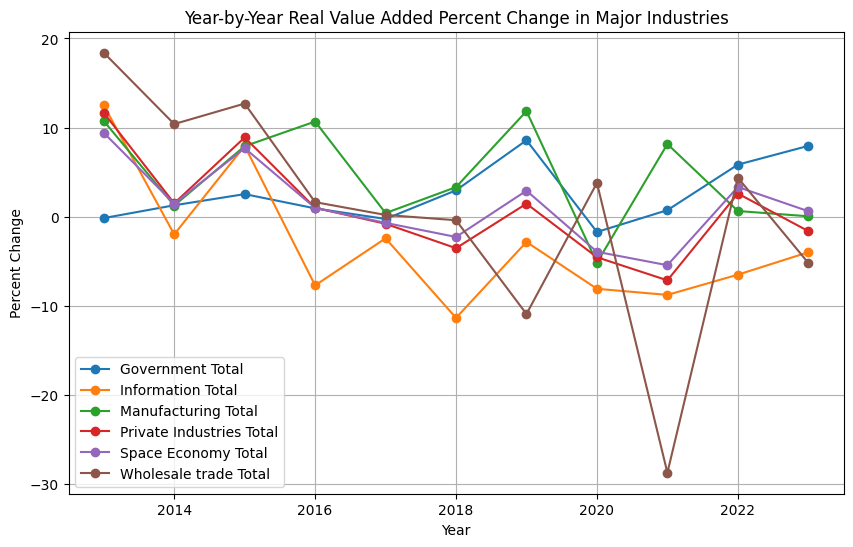

In [123]:
#Used ChatGPT to help write code to graph our data

long_df = df_filtered.melt(
  id_vars=[df_filtered.columns[1]],
  value_vars=year_range,
  var_name="Year",
  value_name="Value"
)

long_df["Year"] = long_df["Year"].astype(int)
long_df["Value"] = pd.to_numeric(long_df["Value"])
long_df = long_df.sort_values([df_filtered.columns[1], "Year"])
long_df["Percent Change"] = long_df.groupby(df_filtered.columns[1])["Value"].pct_change() * 100

plt.figure(figsize=(10,6))
for label, g in long_df.groupby(df_filtered.columns[1]):
  plt.plot(g["Year"], g["Percent Change"], marker="o", label=label)

plt.title("Year-by-Year Real Value Added Percent Change in Major Industries")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

In [124]:
uploaded = files.upload()
table4 = pd.read_excel(io.BytesIO(uploaded['table4_cleaned.xlsx']))

Saving table4_cleaned.xlsx to table4_cleaned.xlsx


In [125]:
year_range = [str(i) for i in range(2012, 2024)]
table4.columns = ["Industry_Group", "Industry", "Subindustry"] + year_range

table4.replace("…", pd.NA, inplace=True)
table4["Industry_Group"] = table4["Industry_Group"].ffill()
table4["Industry"] = table4["Industry"].ffill()

table4.head(15)

,Industry_Group,Industry,Subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space Economy Total,Space Economy Total,NaN,182757,190256,195919,205707,206542,207911,205358,208510,200271,194131,203295,202094
1,Private industries Total,Private Industries Total,NaN,151467,159229,164508,173324,173764,175789,172479,172473,163865,156995,164711,161677
2,Private industries,"Agriculture, forestry, fishing, and hunting Total",NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Private industries,"Agriculture, forestry, fishing, and hunting",Farms,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Private industries,"Agriculture, forestry, fishing, and hunting","Forestry, fishing, and related activities",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,Private industries,Mining Total,NaN,72,54,68,58,34,13,5,7,3,3,3,2
6,Private industries,Mining,Oil and gas extraction,54,40,50,41,24,9,4,4,2,2,2,2
7,Private industries,Mining,"Mining, except oil and gas",0,0,0,1,1,1,0,0,0,0,0,0
8,Private industries,Mining,Support activities for mining,18,14,17,15,9,3,2,2,1,1,1,1
9,Private industries,Utilities Total,NaN,2,1,1,3,3,3,2,2,2,2,2,2


In [126]:
df_totals_only = table4[table4[table4.columns[1]]
                        .astype(str)
                        .str.contains("Total", case=False, na=False)]

df_reals_only = df_totals_only.dropna(subset=[df_totals_only.columns[14]]).drop(columns=[df_totals_only.columns[2]])
df_filtered = df_reals_only[df_reals_only[df_reals_only.columns[3]] >= 29000]

df_filtered.head(15)

,Industry_Group,Industry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space Economy Total,Space Economy Total,182757,190256,195919,205707,206542,207911,205358,208510,200271,194131,203295,202094
1,Private industries Total,Private Industries Total,151467,159229,164508,173324,173764,175789,172479,172473,163865,156995,164711,161677
11,Private industries,Manufacturing Total,44500,45870,46345,48639,50423,50217,52215,57984,55157,55601,59475,61224
14,Private industries,Wholesale trade Total,29109,32868,35800,39743,41461,44876,46038,40826,40181,37101,38839,36402
29,Private industries,Information Total,60813,63569,65895,67671,64263,62747,57238,55479,52180,47624,45241,43112
48,Government Total,Government Total,31535,31098,31441,32383,32786,32122,32870,35989,36335,37076,38518,40343


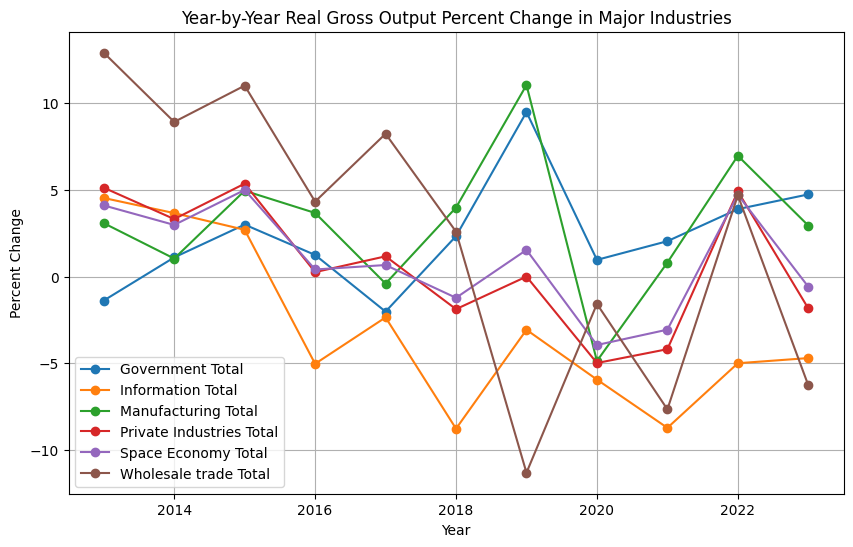

In [127]:
#Used ChatGPT to help write code to graph our data

long_df = df_filtered.melt(
  id_vars=[df_filtered.columns[1]],
  value_vars=year_range,
  var_name="Year",
  value_name="Value"
)

long_df["Year"] = long_df["Year"].astype(int)
long_df["Value"] = pd.to_numeric(long_df["Value"])
long_df = long_df.sort_values([df_filtered.columns[1], "Year"])
long_df["Percent Change"] = long_df.groupby(df_filtered.columns[1])["Value"].pct_change() * 100

plt.figure(figsize=(10,6))
for label, g in long_df.groupby(df_filtered.columns[1]):
  plt.plot(g["Year"], g["Percent Change"], marker="o", label=label)

plt.title("Year-by-Year Real Gross Output Percent Change in Major Industries")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

In [128]:
uploaded = files.upload()
table7 = pd.read_excel(io.BytesIO(uploaded['table7_cleaned.xlsx']))

Saving table7_cleaned.xlsx to table7_cleaned.xlsx


In [129]:
year_range = [str(i) for i in range(2012, 2024)]
table7.columns = ["Industry_Group", "Industry", "Subindustry"] + year_range

table7.replace("…", pd.NA, inplace=True)
table7["Industry_Group"] = table7["Industry_Group"].ffill()
table7["Industry"] = table7["Industry"].ffill()

table7.head(15)

,Industry_Group,Industry,Subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Space economy, private industries",Private Industries Total,NaN,433,432,426,424,411,399,387,390,365,351,361,373
1,"Space economy, private industries","Agriculture, forestry, fishing, and hunting Total",NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,"Space economy, private industries","Agriculture, forestry, fishing, and hunting",Farms,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,"Space economy, private industries","Agriculture, forestry, fishing, and hunting","Forestry, fishing, and related activities",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,"Space economy, private industries",Mining total,NaN,0,0,0,0,0,0,0,0,0,0,0,0
5,"Space economy, private industries",Mining,Oil and gas extraction,0,0,0,0,0,0,0,0,0,0,0,0
6,"Space economy, private industries",Mining,"Mining, except oil and gas",0,0,0,0,0,0,0,0,0,0,0,0
7,"Space economy, private industries",Mining,Support activities for mining,0,0,0,0,0,0,0,0,0,0,0,0
8,"Space economy, private industries",Utilities,NaN,0,0,0,0,0,0,0,0,0,0,0,0
9,"Space economy, private industries",Construction,NaN,1,1,1,1,1,2,1,2,2,2,3,2


In [130]:
df_totals_only = table7[table7[table7.columns[1]]
                        .astype(str)
                        .str.contains("Total", case=False, na=False)]

df_reals_only = df_totals_only.dropna(subset=[df_totals_only.columns[14]]).drop(columns=[df_totals_only.columns[2]])
df_filtered = df_reals_only[df_reals_only[df_reals_only.columns[3]] >= 51]

df_filtered.head(15)

,Industry_Group,Industry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Space economy, private industries",Private Industries Total,433,432,426,424,411,399,387,390,365,351,361,373
10,"Space economy, private industries",Manufacturing Total,136,137,133,131,128,118,116,123,112,111,104,109
13,"Space economy, private industries",Wholesale trade Total,94,90,87,91,91,94,93,89,87,84,88,85
28,"Space economy, private industries",Information Total,120,123,125,118,108,106,98,93,85,75,72,70


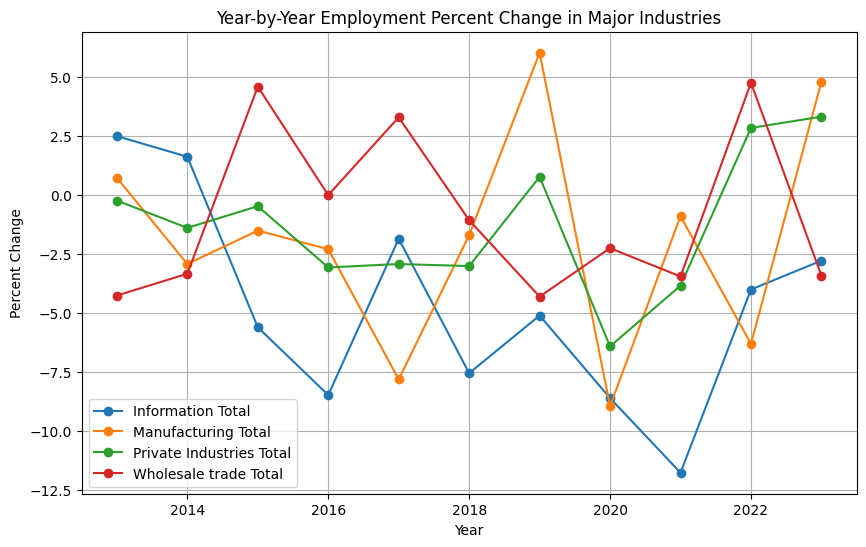

In [131]:
#Used ChatGPT to help write code to graph our data

long_df = df_filtered.melt(
  id_vars=[df_filtered.columns[1]],
  value_vars=year_range,
  var_name="Year",
  value_name="Value"
)

long_df["Year"] = long_df["Year"].astype(int)
long_df["Value"] = pd.to_numeric(long_df["Value"])
long_df = long_df.sort_values([df_filtered.columns[1], "Year"])
long_df["Percent Change"] = long_df.groupby(df_filtered.columns[1])["Value"].pct_change() * 100

plt.figure(figsize=(10,6))
for label, g in long_df.groupby(df_filtered.columns[1]):
  plt.plot(g["Year"], g["Percent Change"], marker="o", label=label)

plt.title("Year-by-Year Employment Percent Change in Major Industries")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

In [132]:
uploaded = files.upload()
table8 = pd.read_excel(io.BytesIO(uploaded['table8_cleaned.xlsx']))

Saving table8_cleaned.xlsx to table8_cleaned.xlsx


In [133]:
year_range = [str(i) for i in range(2012, 2024)]
table8.columns = ["Industry_Group", "Industry", "Subindustry"] + year_range

table8.replace("…", pd.NA, inplace=True)
table8["Industry_Group"] = table8["Industry_Group"].ffill()
table8["Industry"] = table8["Industry"].ffill()

table8.head(15)

,Industry_Group,Industry,Subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Private industries Total,Private Industries Total,NaN,44438,45211,45941,48237,47959,49104,48686,52606,51661,52655,54975,57924
1,Private industries,"Agriculture, forestry, fishing, and hunting Total",NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Private industries,"Agriculture, forestry, fishing, and hunting",Farms,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Private industries,"Agriculture, forestry, fishing, and hunting","Forestry, fishing, and related activities",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Private industries,Mining Total,NaN,10,8,9,11,7,2,1,1,1,0,0,0
5,Private industries,Mining,Oil and gas extraction,5,4,5,7,4,1,0,0,0,0,0,0
6,Private industries,Mining,"Mining, except oil and gas",0,0,0,0,0,0,0,0,0,0,0,0
7,Private industries,Mining,Support activities for mining,5,4,4,4,3,1,0,1,0,0,0,0
8,Private industries,Utilities Total,NaN,0,0,0,1,1,1,0,0,0,0,0,0
9,Private industries,Construction Total,NaN,122,100,170,212,214,322,209,651,541,338,457,508


In [134]:
df_totals_only = table8[table8[table8.columns[1]]
                        .astype(str)
                        .str.contains("Total", case=False, na=False)]

df_reals_only = df_totals_only.dropna(subset=[df_totals_only.columns[14]]).drop(columns=[df_totals_only.columns[2]])
df_filtered = df_reals_only[df_reals_only[df_reals_only.columns[3]] >= 7000]

df_filtered.head(15)

,Industry_Group,Industry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Private industries Total,Private Industries Total,44438,45211,45941,48237,47959,49104,48686,52606,51661,52655,54975,57924
10,Private industries,Manufacturing Total,19435,19334,19184,19837,20098,20303,20531,23972,23243,24035,23106,24270
13,Private industries,Wholesale trade Total,7708,7612,7667,8402,8676,9262,9415,9058,9219,9442,10279,10483
28,Private industries,Information Total,10347,11018,11688,11789,11116,11366,10665,10596,10231,9744,9795,10230


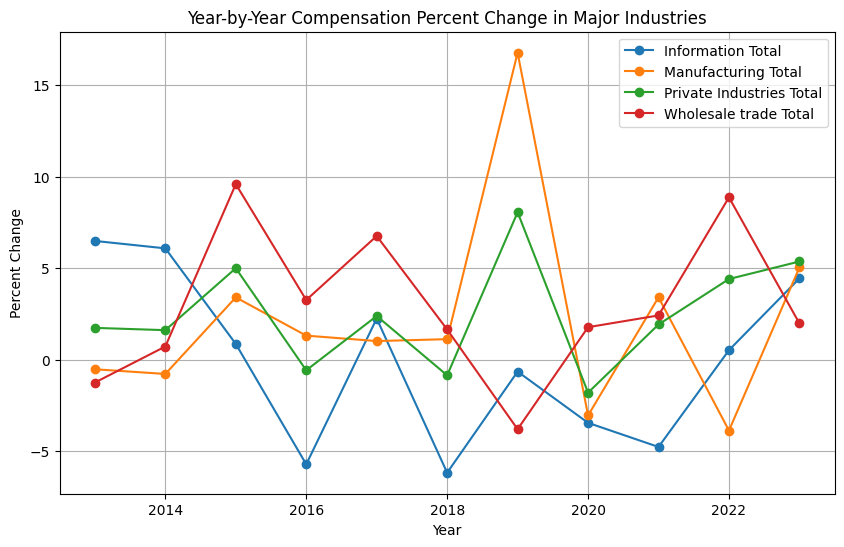

In [135]:
#Used ChatGPT to help write code to graph our data

long_df = df_filtered.melt(
  id_vars=[df_filtered.columns[1]],
  value_vars=year_range,
  var_name="Year",
  value_name="Value"
)

long_df["Year"] = long_df["Year"].astype(int)
long_df["Value"] = pd.to_numeric(long_df["Value"])
long_df = long_df.sort_values([df_filtered.columns[1], "Year"])
long_df["Percent Change"] = long_df.groupby(df_filtered.columns[1])["Value"].pct_change() * 100

plt.figure(figsize=(10,6))
for label, g in long_df.groupby(df_filtered.columns[1]):
  plt.plot(g["Year"], g["Percent Change"], marker="o", label=label)

plt.title("Year-by-Year Compensation Percent Change in Major Industries")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()